<a href="https://colab.research.google.com/github/jung0522/artificial_intelligence/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>
#HW#4
###숙제 번호: HW#4 <br>
###과목명: 인공지능 <br>
###이름: 정준영 <br>
###전공: 컴퓨터과학 <br>
###학번: 202011024 <br><br><br><br><br>

In [ ]:
%cd /content/drive/MyDrive/AI Lab/artificial_intelligence/cifar-10-batches-py

/content/drive/MyDrive/AI Lab/artificial_intelligence/cifar-10-batches-py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Training with batch size: 100
Epoch 1/20, Loss: 2.287554465153197
Epoch 2/20, Loss: 2.259615591682582
Epoch 3/20, Loss: 2.2397153702852477
Epoch 4/20, Loss: 2.2222483957276427
Epoch 5/20, Loss: 2.2052082425806288
Epoch 6/20, Loss: 2.188479339365762
Epoch 7/20, Loss: 2.1722699109161274
Epoch 8/20, Loss: 2.1567865412071545
Epoch 9/20, Loss: 2.1417502807492106
Epoch 10/20, Loss: 2.1274240303521386
Epoch 11/20, Loss: 2.113568787355522
Epoch 12/20, Loss: 2.100442198935376
Epoch 13/20, Loss: 2.087972400928152
Epoch 14/20, Loss: 2.0760749670967034
Epoch 15/20, Loss: 2.064670403976917
Epoch 16/20, Loss: 2.053739819905455
Epoch 17/20, Loss: 2.0431216727131156
Epoch 18/20, Loss: 2.0332266134649815
Epoch 19/20, Loss: 2.023825830930094
Epoch 20/20, Loss: 2.014786686714924
Training with batch size: 200
Epoch 1/20, Loss: 2.293185772087514
Epoch 2/20, Loss: 2.273930868089624
Epoch 3/20, Loss: 2.2603470569971544
Epoch 4/20, Loss: 2.2493297954568336
Epoch 5/20, Loss: 2.239411100863832
Epoch 6/20, Loss:

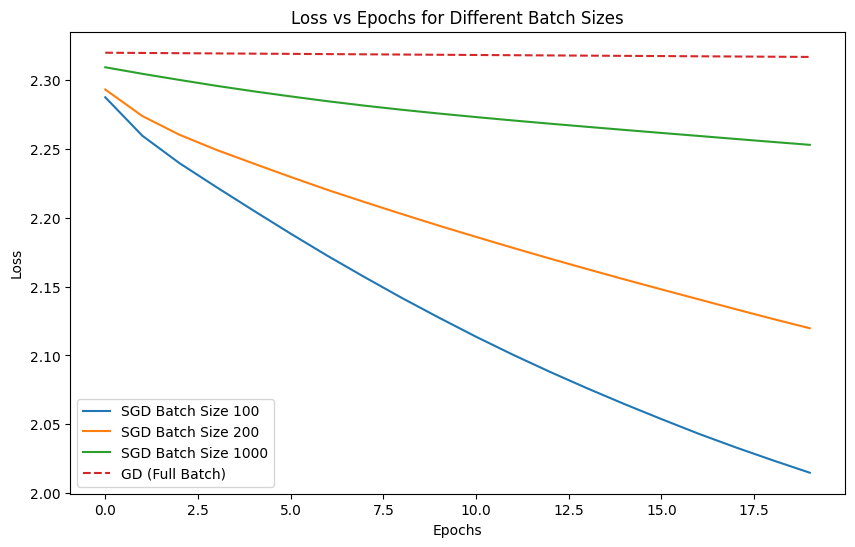

Best batch size: 100
Epoch 1/20, Loss: 2.287847225330355
Epoch 2/20, Loss: 2.2584692486881646
Epoch 3/20, Loss: 2.237787974032509
Epoch 4/20, Loss: 2.2194638408618212
Epoch 5/20, Loss: 2.201072545004207
Epoch 6/20, Loss: 2.1841331482829953
Epoch 7/20, Loss: 2.1682354214440744
Epoch 8/20, Loss: 2.152564577555071
Epoch 9/20, Loss: 2.137589058349217
Epoch 10/20, Loss: 2.1232174970181066
Epoch 11/20, Loss: 2.1093147153161804
Epoch 12/20, Loss: 2.0959311928063458
Epoch 13/20, Loss: 2.082773310743981
Epoch 14/20, Loss: 2.0706739483965
Epoch 15/20, Loss: 2.0592759160223664
Epoch 16/20, Loss: 2.048679266878971
Epoch 17/20, Loss: 2.038595839911613
Epoch 18/20, Loss: 2.028907825685855
Epoch 19/20, Loss: 2.0197484957465925
Epoch 20/20, Loss: 2.0108811078218816
The accuracy is 32.450000%


In [ ]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pickle

# 데이터셋 파일을 언피클하는 헬퍼 함수
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# CIFAR-10 데이터 로드
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

# 훈련 데이터 결합
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'], bat4[b'data'], bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'], bat4[b'labels'], bat5[b'labels']])

# 데이터 정규화
data = data.astype('float32') / 255.0

# 원-핫 인코딩 함수
def one_hot_encode(labels, num_classes=10):
    one_hot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    return one_hot

t_label = one_hot_encode(labels)

# 하이퍼파라미터 설정
N, D_in = data.shape
H, D_out = 500, 10
lr = 1e-4
epochs = 20

# 가중치 초기화 함수
def initialize_weights(input_dim, output_dim):
    return randn(input_dim, output_dim) * 0.01

w1 = initialize_weights(D_in, H)
w2 = initialize_weights(H, D_out)

# 활성화 함수
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def compute_loss(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / y_true.shape[0]

# SGD를 사용한 훈련 함수
def train_sgd(data, labels, batch_size, epochs, lr):
    global w1, w2
    N, D_in = data.shape
    losses = []

    for epoch in range(epochs):
        # 데이터 셔플
        perm = np.random.permutation(N)
        data_shuffled = data[perm]
        labels_shuffled = labels[perm]

        epoch_loss = 0

        for i in range(0, N, batch_size):
            end = i + batch_size if i + batch_size <= N else N
            batch_data = data_shuffled[i:end]
            batch_labels = labels_shuffled[i:end]

            # 순방향 전파
            z1 = np.dot(batch_data, w1)
            h = relu(z1)
            z2 = np.dot(h, w2)
            y_pred = softmax(z2)

            # 손실 계산
            loss = compute_loss(y_pred, batch_labels)
            epoch_loss += loss

            # 역방향 전파
            grad_y_pred = (y_pred - batch_labels) / batch_data.shape[0]
            grad_w2 = np.dot(h.T, grad_y_pred)
            grad_h = np.dot(grad_y_pred, w2.T)
            grad_z1 = grad_h * (z1 > 0)  # ReLU의 미분
            grad_w1 = np.dot(batch_data.T, grad_z1)

            # 가중치 업데이트
            w1 -= lr * grad_w1
            w2 -= lr * grad_w2

        losses.append(epoch_loss / (N // batch_size))
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / (N // batch_size)}")

    return losses

# 평가 함수
def evaluate(test_data, test_labels):
    global w1, w2
    z1 = np.dot(test_data, w1)
    h = relu(z1)
    z2 = np.dot(h, w2)
    y_pred = softmax(z2)
    Y_predict = np.argmax(y_pred, axis=1)
    accuracy = np.mean(Y_predict == test_labels) * 100
    print("The accuracy is %f%%" % accuracy)
    return accuracy

# 테스트 데이터 준비
test_data = bat_test[b'data'].astype("float32") / 255.0
test_label = np.array(bat_test[b'labels'])

# 다양한 배치 크기로 훈련
batch_sizes = [100, 200, 1000]
losses_sgd = {}

for batch_size in batch_sizes:
    # 각 실행마다 가중치 재초기화
    w1 = initialize_weights(D_in, H)
    w2 = initialize_weights(H, D_out)
    print(f"Training with batch size: {batch_size}")
    losses_sgd[batch_size] = train_sgd(data, t_label, batch_size, epochs, lr)

# 전체 배치로 훈련 (GD)
print("Training with full batch (GD)")
w1 = initialize_weights(D_in, H)
w2 = initialize_weights(H, D_out)
losses_gd = train_sgd(data, t_label, N, epochs, lr)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(range(epochs), losses_sgd[batch_size], label=f'SGD Batch Size {batch_size}')
plt.plot(range(epochs), losses_gd, label='GD (Full Batch)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs for Different Batch Sizes')
plt.show()

# 최적의 배치 크기로 모델 평가
best_batch_size = min(losses_sgd, key=lambda k: min(losses_sgd[k]))
print(f"Best batch size: {best_batch_size}")

# 최적의 배치 크기로 재훈련
w1 = initialize_weights(D_in, H)
w2 = initialize_weights(H, D_out)
losses_best = train_sgd(data, t_label, best_batch_size, epochs, lr)
accuracy = evaluate(test_data, test_label)